In [1]:
'''Part 1: Imports all of the (26) KD sessions and organizes them into a dictionary where each key (session title) connects to a filepaths of the 3 files (.CSV, KDPF.DAT, and KDHC.DAT) and the 3 corresponding tensors
           Prints out each session key and the 3 filepaths paired with that session key'''

import torch
import pandas as pd
import os
from collections import defaultdict

# Setup
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/My Drive/Colab Notebooks/Valid Trials Data'

# Dictionary to hold the association of rat/date/type with tensors
rat_date_type_tensors = defaultdict(lambda: {'file_paths': [], 'tensors': []})

for filename in os.listdir(folder_path):
  if 'KD' in filename:
    # Split the filename to extract rat, date, and type information
    parts = filename.split('_')
    rat_date = parts[0]  # This gives something like 'R522-2019-03-18'
    type_part = parts[1]
    key = rat_date + ('_KD' if 'KD' in type_part else '_RD')
    file_path = os.path.join(folder_path, filename)
    rat_date_type_tensors[key]['file_paths'].append(file_path)

# Processing files and converting to tensors
for rat_date_type, data in rat_date_type_tensors.items():
    print(f"Processing group for {rat_date_type}:")
    for file_path in data['file_paths']:
        try:
            if file_path.endswith('KD.csv'):
                # For CSV files
                df = pd.read_csv(file_path)
                tensor = torch.tensor(df.values, dtype=torch.float32)
            elif file_path.endswith('.dat') and 'KD' in file_path:
                # For DAT files
                df = pd.read_csv(file_path, delimiter=',')
                if df.shape[1] % 400 != 0:
                    raise ValueError(f"Number of columns in {file_path} is not a multiple of 400.")
                reshaped_data = df.values.reshape(df.shape[0], int(df.shape[1] / 400), 400)
                tensor = torch.tensor(reshaped_data, dtype=torch.float32)
            data['tensors'].append(tensor)
            print(f" - {file_path}: Converted to tensor of shape {tensor.shape}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

print(f"Total groups processed: {len(rat_date_type_tensors)}")
#print(rat_date_type_tensors)

Mounted at /content/drive
Processing group for R423-2017-08-07_KD:
 - /content/drive/My Drive/Colab Notebooks/Valid Trials Data/R423-2017-08-07_KD.csv: Converted to tensor of shape torch.Size([82, 1])
 - /content/drive/My Drive/Colab Notebooks/Valid Trials Data/R423-2017-08-07_KDHC.dat: Converted to tensor of shape torch.Size([82, 36, 400])
 - /content/drive/My Drive/Colab Notebooks/Valid Trials Data/R423-2017-08-07_KDPF.dat: Converted to tensor of shape torch.Size([82, 18, 400])
Processing group for R397-2017-06-09_KD:
 - /content/drive/My Drive/Colab Notebooks/Valid Trials Data/R397-2017-06-09_KD.csv: Converted to tensor of shape torch.Size([87, 1])
 - /content/drive/My Drive/Colab Notebooks/Valid Trials Data/R397-2017-06-09_KDPF.dat: Converted to tensor of shape torch.Size([87, 13, 400])
 - /content/drive/My Drive/Colab Notebooks/Valid Trials Data/R397-2017-06-09_KDHC.dat: Converted to tensor of shape torch.Size([87, 31, 400])
Processing group for R442-2018-03-17_KD:
 - /content/dri

Total groups processed: 26 

Dictionary keys: dict_keys(['R423-2017-08-07_KD', 'R397-2017-06-09_KD', 'R442-2018-03-17_KD', 'R417-2017-10-31_KD', 'R417-2017-10-28_KD', 'R417-2017-11-02_KD', 'R423-2017-08-04_KD', 'R423-2017-08-05_KD', 'R423-2017-08-02_KD', 'R442-2018-03-22_KD', 'R442-2018-03-20_KD', 'R442-2018-03-19_KD', 'R465-2018-08-14_KD', 'R501-2019-01-04_KD', 'R501-2019-01-06_KD', 'R497-2018-11-01_KD', 'R465-2018-08-15_KD', 'R497-2018-11-05_KD', 'R497-2018-11-04_KD', 'R465-2018-08-18_KD', 'R465-2018-08-20_KD', 'R501-2019-01-09_KD', 'R522-2019-03-13_KD', 'R522-2019-03-15_KD', 'R522-2019-03-16_KD', 'R522-2019-03-18_KD']) 

R423-2017-08-07_KD
torch.Size([82, 36, 400]) =#trials, #neurons, #time bins
torch.Size([82, 18, 400]) =#trials, #neurons, #time bins


R397-2017-06-09_KD
torch.Size([87, 13, 400]) =#trials, #neurons, #time bins
torch.Size([87, 31, 400]) =#trials, #neurons, #time bins


R442-2018-03-17_KD
torch.Size([93, 44, 400]) =#trials, #neurons, #time bins
torch.Size([93, 68, 40

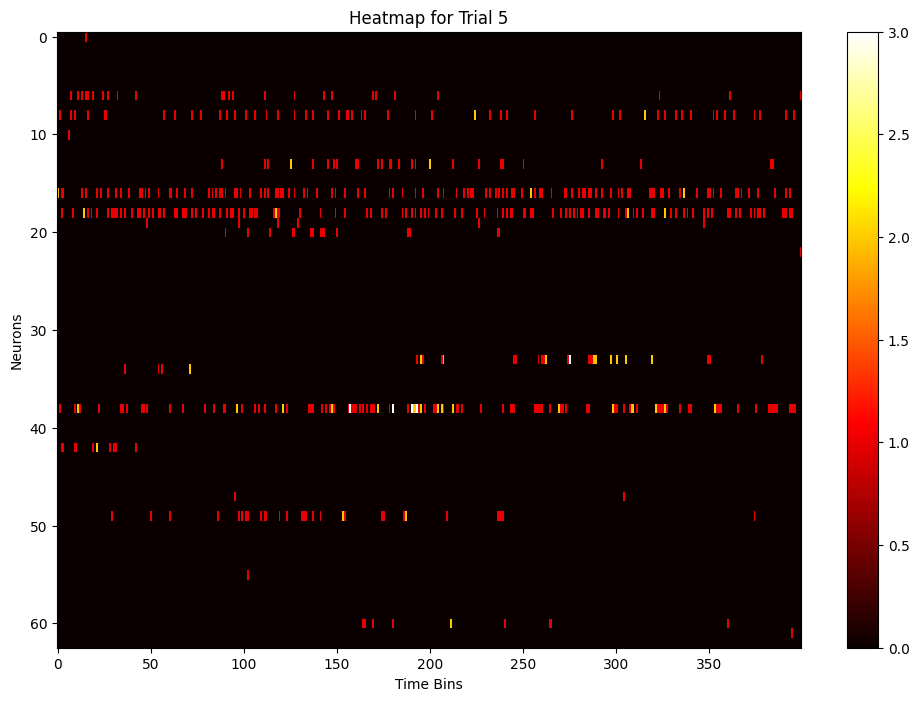

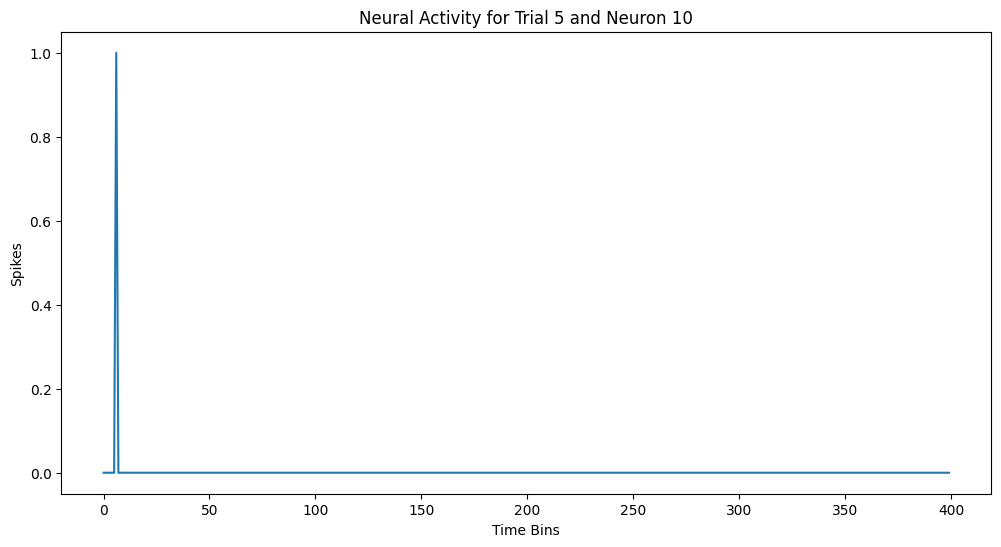

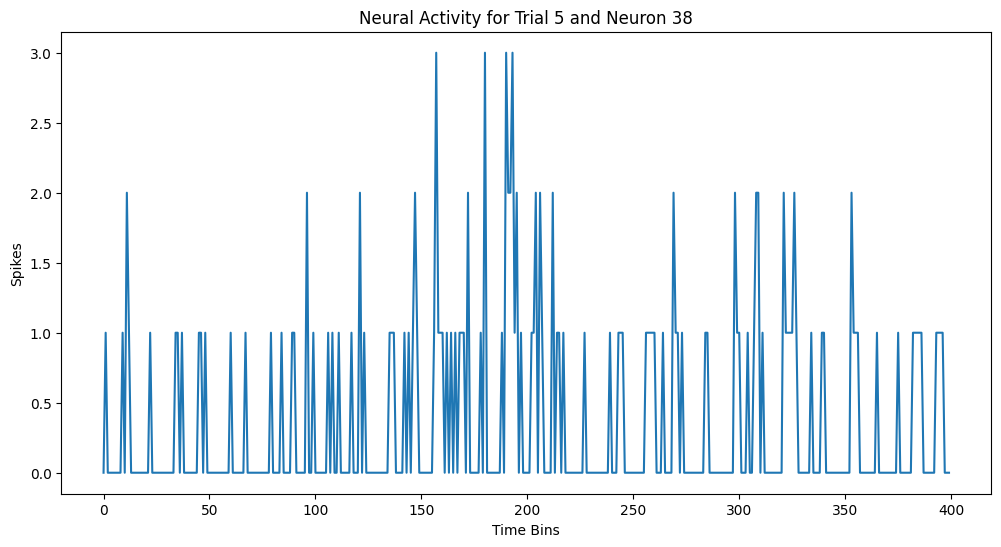

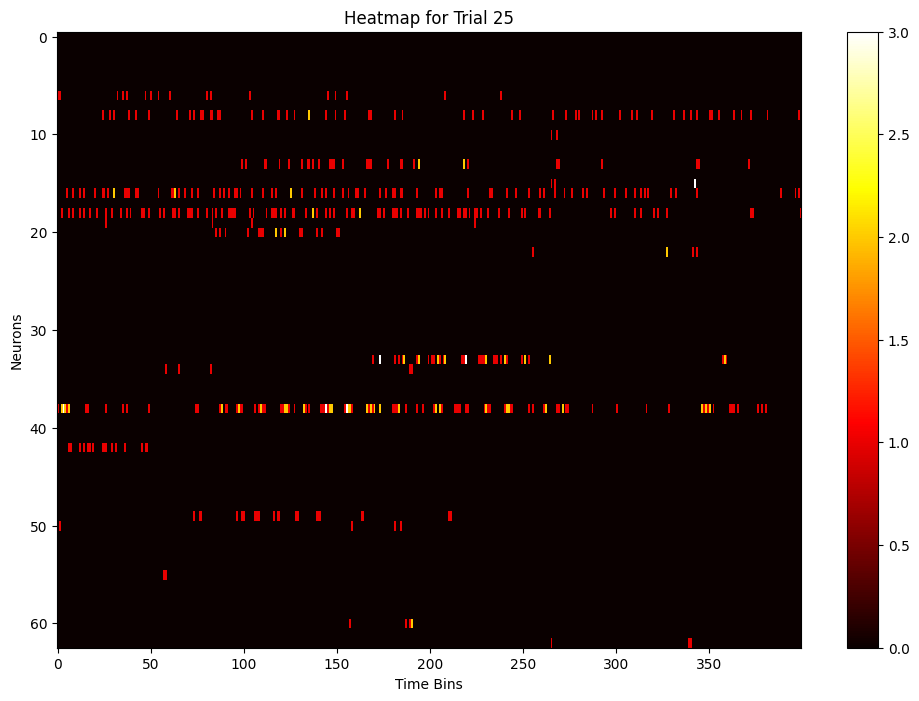

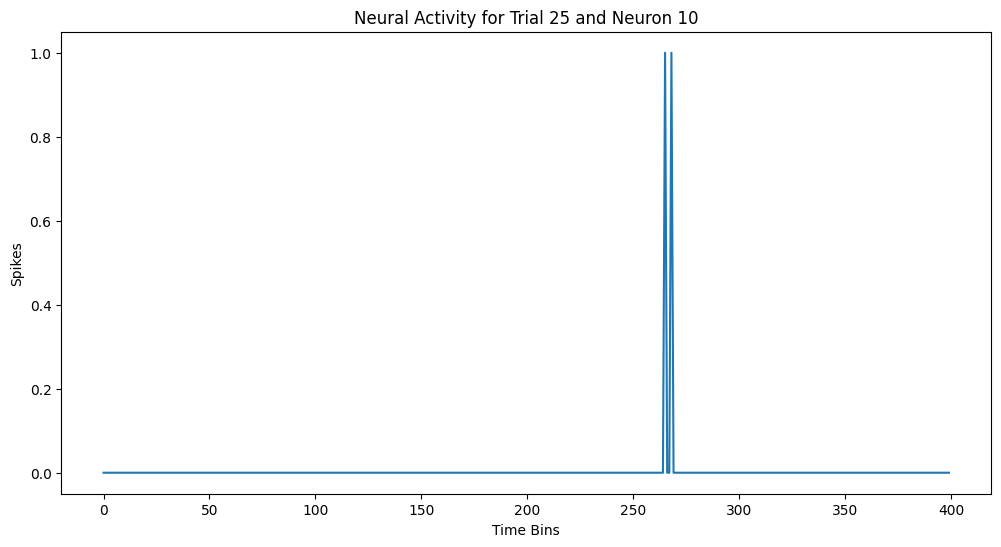

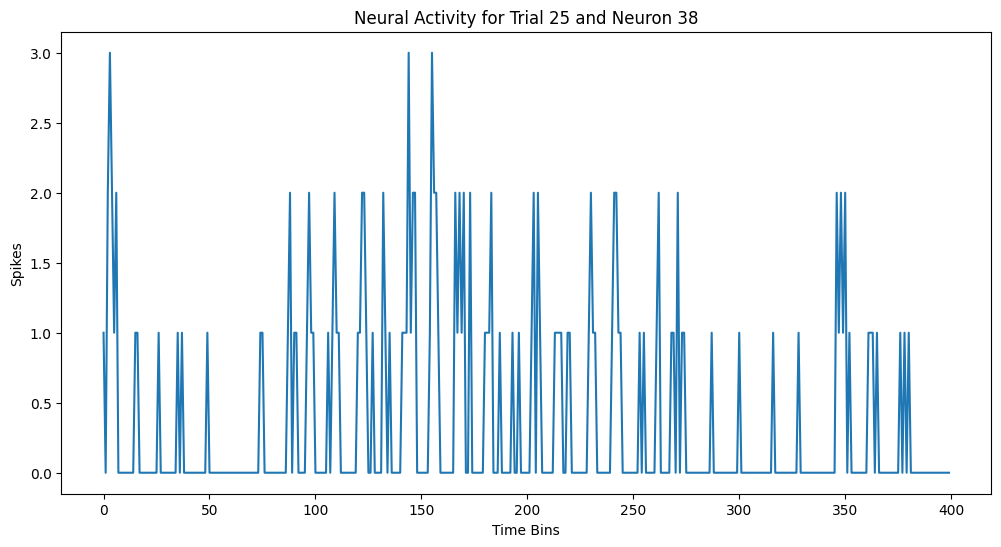

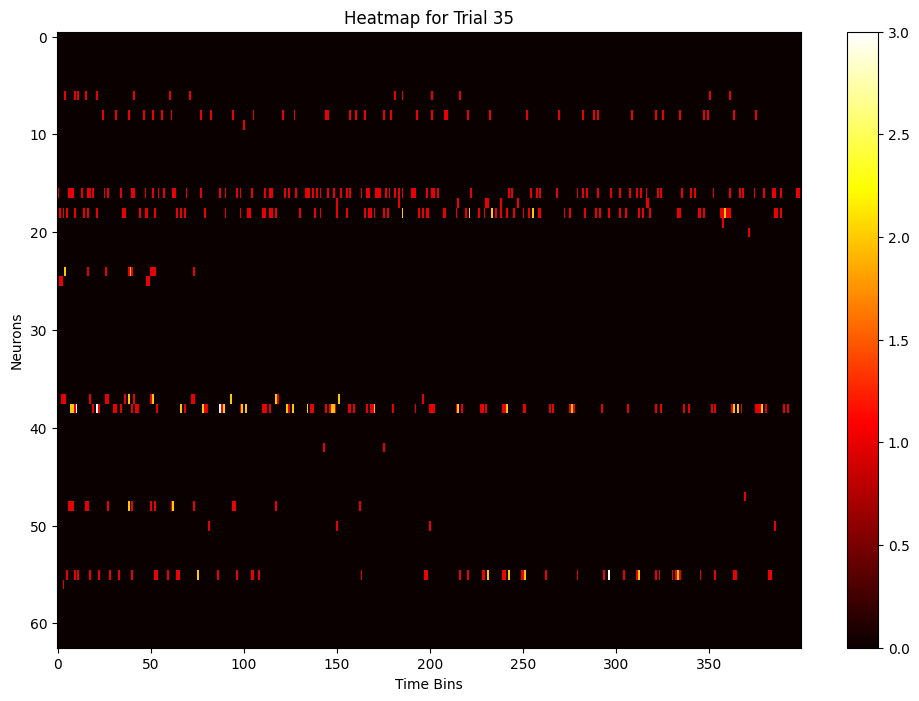

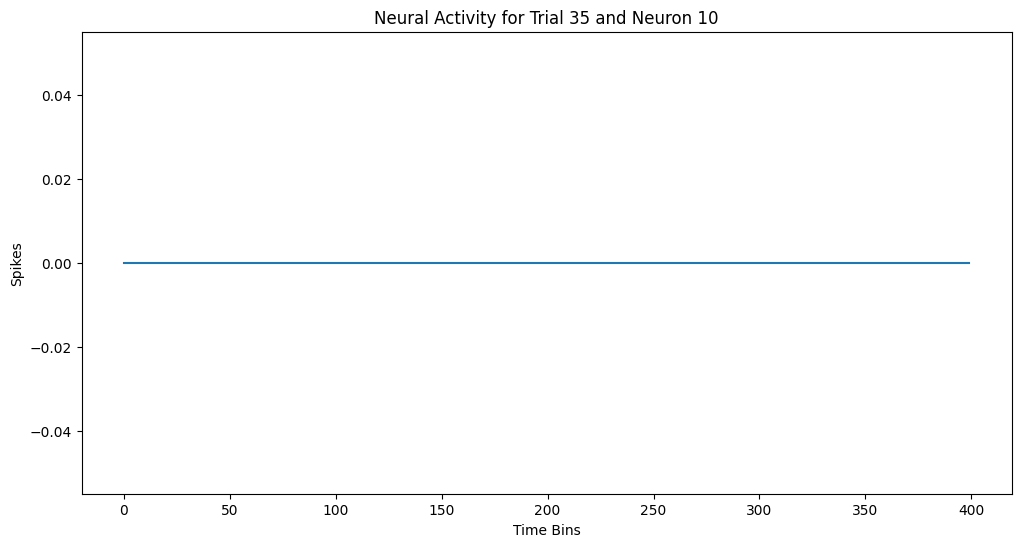

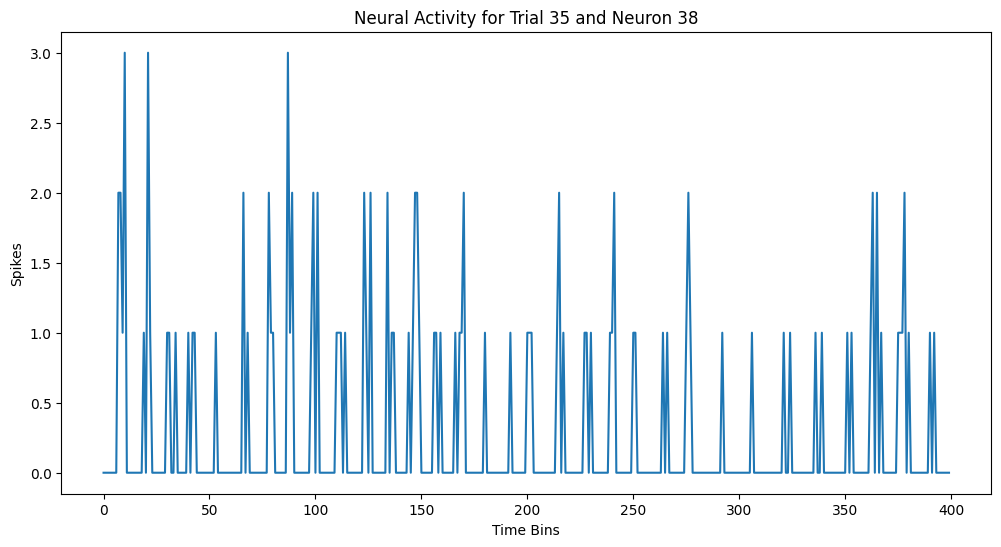

File: /content/drive/My Drive/Colab Notebooks/Valid Trials Data/R442-2018-03-19_KDPF.dat
 - Tensor Size: torch.Size([85, 69, 400]), the first number is how many trials and should match the number for the behavioral tensor; the second number is how many neurons for this data (for this particular rat+date+KD+HC pairing); the third number details that we (always) have 400 time bins
 - Avg of Tensor Data: 0.12084867805242538
 - Min of Tensor Data: 0.0
 - Max of Tensor Data: 5.0


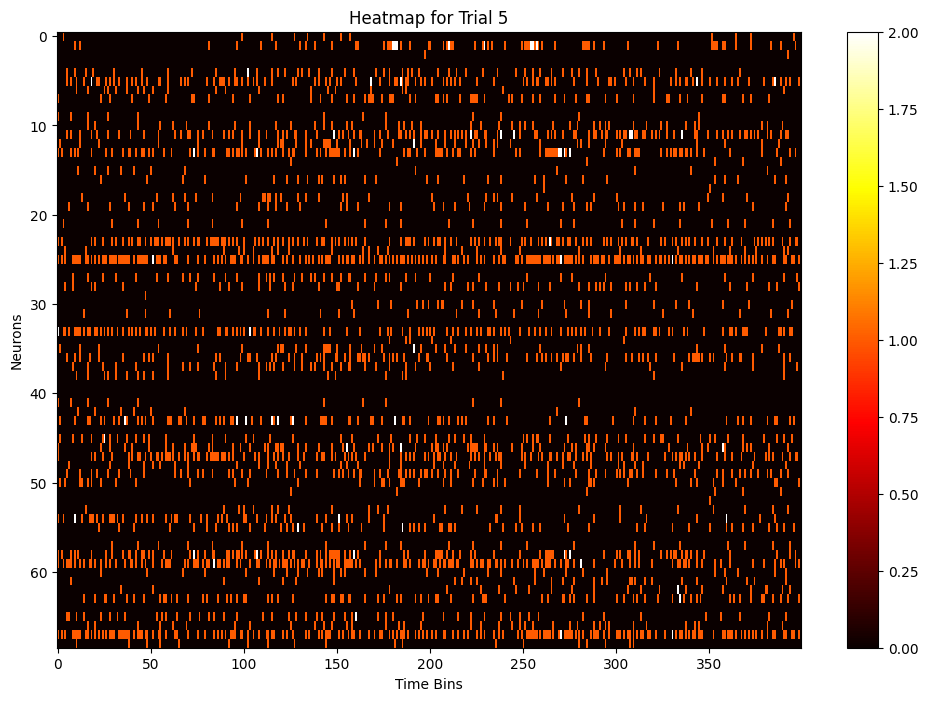

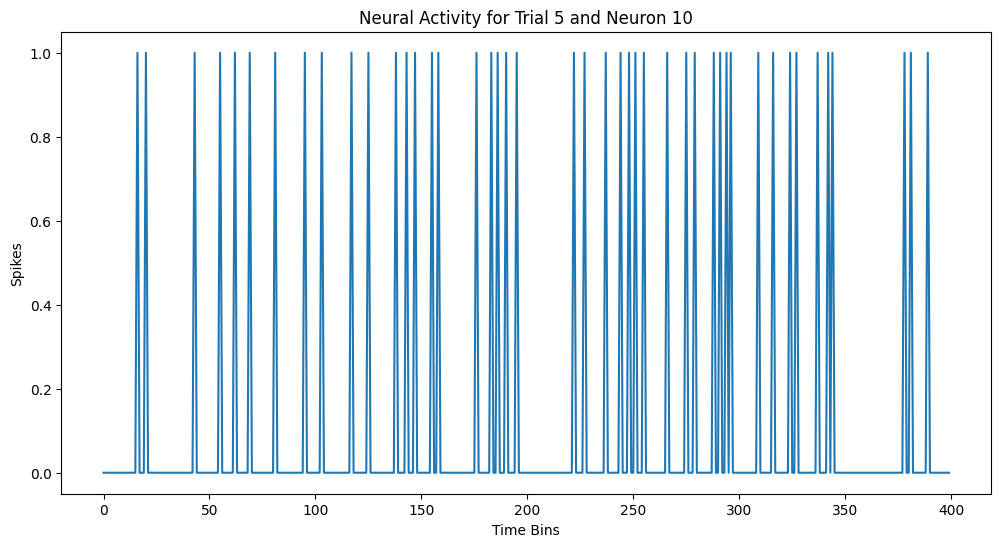

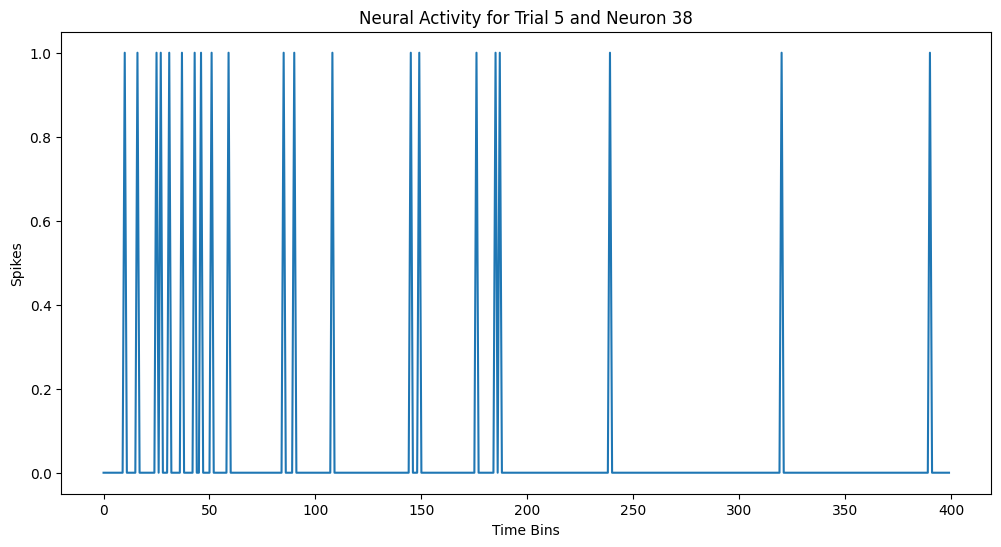

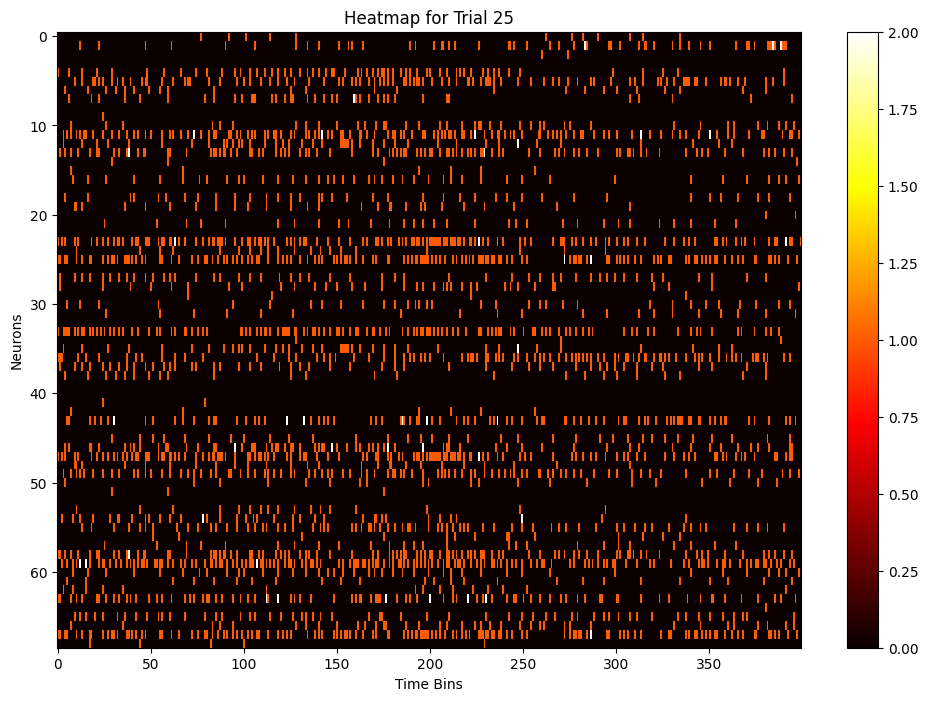

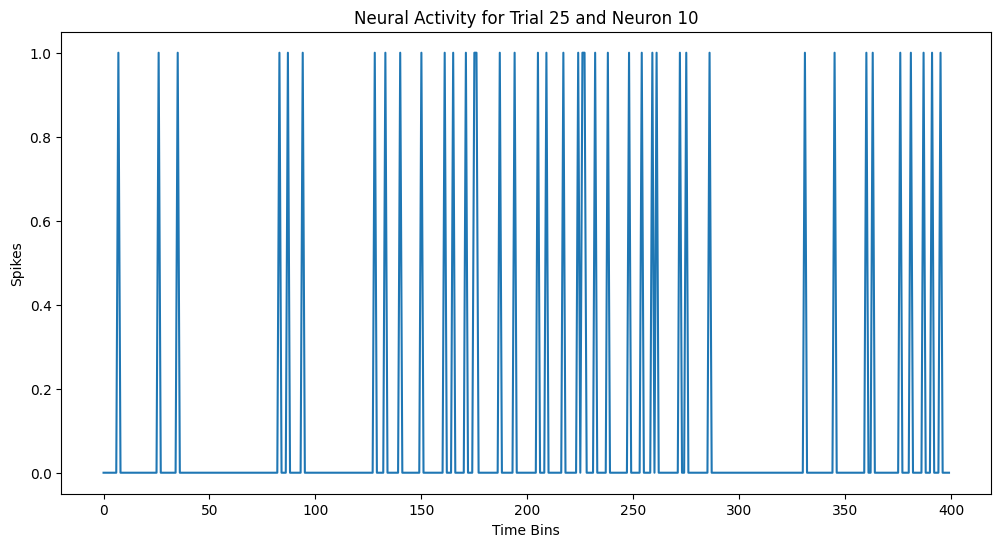

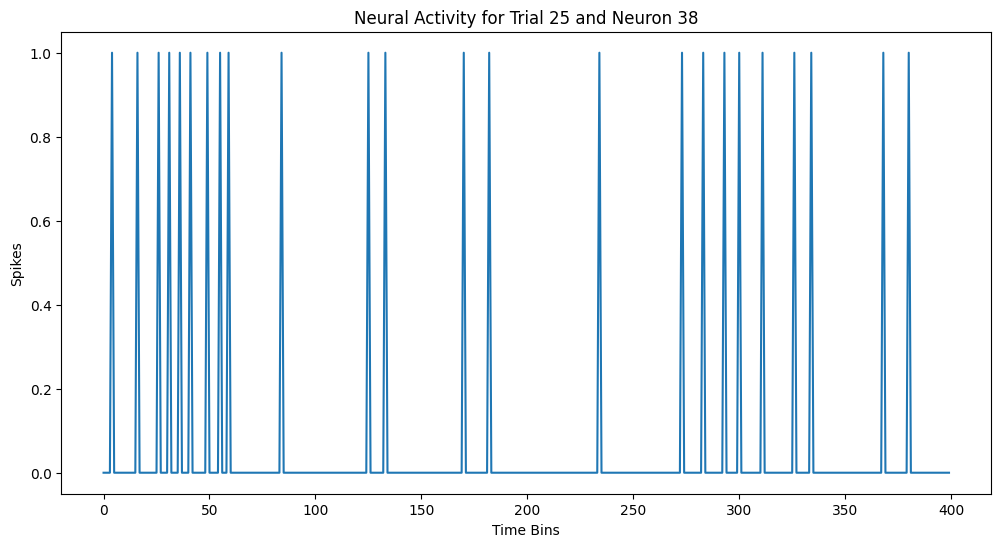

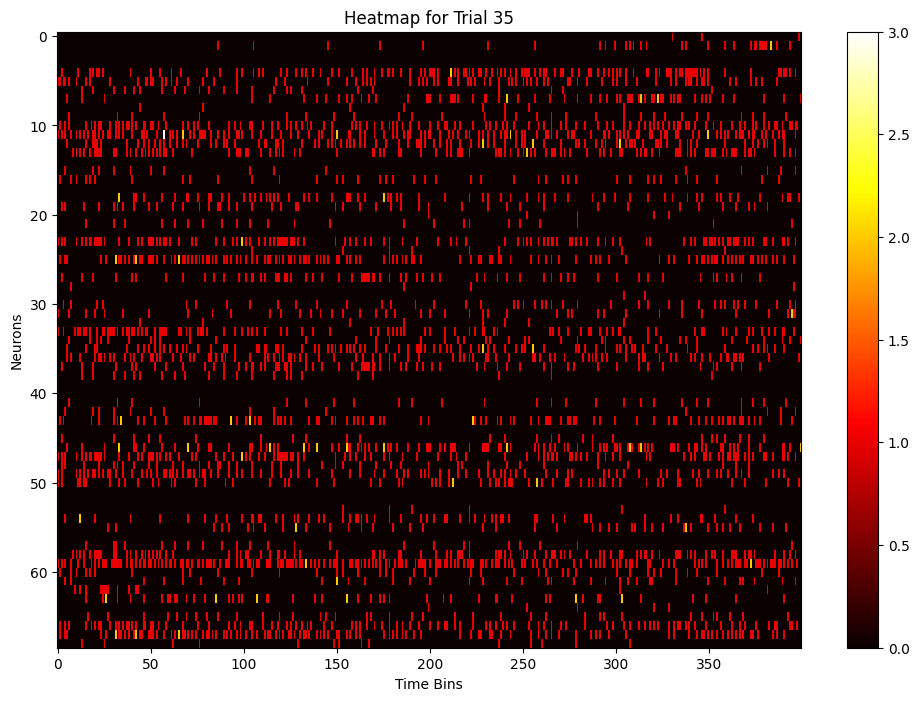

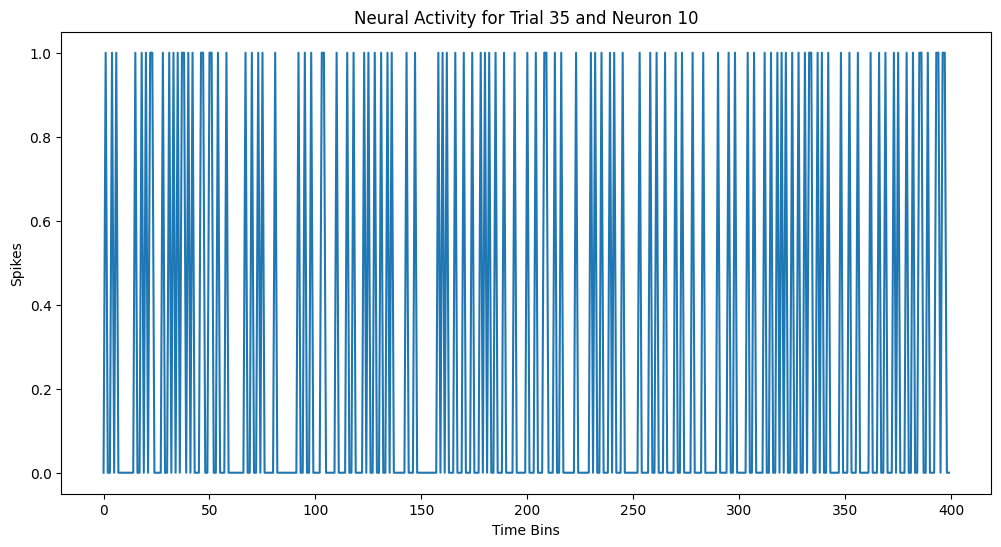

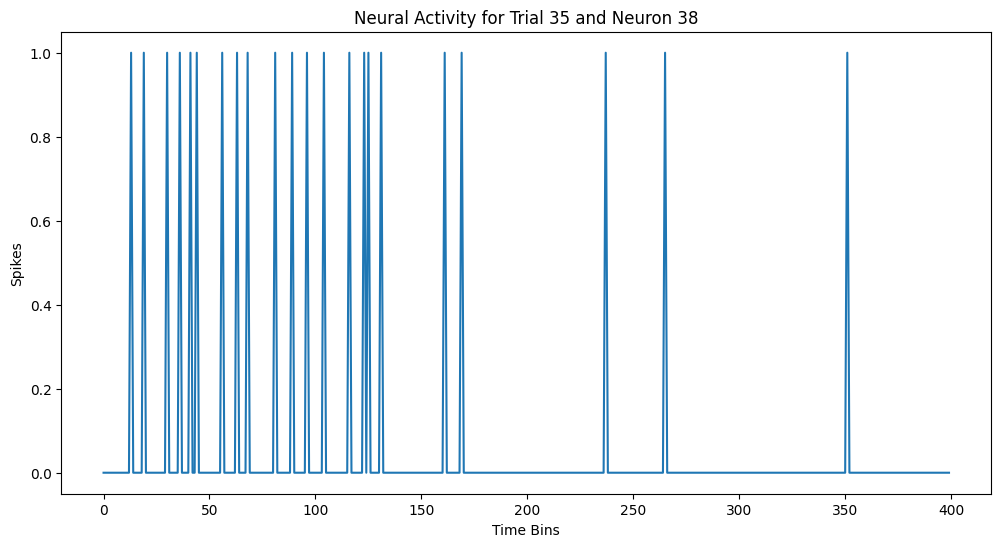

In [2]:
'''[OPTIONAL TO RUN] Part 1 print statements & visualizaritons. Visualizes some heatmaps (per trial) and some timeseries (per trial and per neuron)'''

import matplotlib.pyplot as plt

print(f"Total groups processed: {len(rat_date_type_tensors)} \n")
print('Dictionary keys:', rat_date_type_tensors.keys(), '\n')

for key in rat_date_type_tensors:
  print(key)
  print(rat_date_type_tensors[key]['tensors'][1].shape, '=#trials, #neurons, #time bins')
  print(rat_date_type_tensors[key]['tensors'][2].shape, '=#trials, #neurons, #time bins')
  print('\n')

#Example of R423-2017-08-07_KD session:
# print('\nExample of R423-2017-08-07_KD session:')
# print('.CSV filename =', rat_date_type_tensors['R423-2017-08-07_KD']['file_paths'][0])
# print('Its tensor =', rat_date_type_tensors['R423-2017-08-07_KD']['tensors'][0])
# print('1st .DAT filename =', rat_date_type_tensors['R423-2017-08-07_KD']['file_paths'][1])
# print('Its .DAT tensor =', rat_date_type_tensors['R423-2017-08-07_KD']['tensors'][1])
# print('2nd filename =', rat_date_type_tensors['R423-2017-08-07_KD']['file_paths'][2])
# print('Its tensor =', rat_date_type_tensors['R423-2017-08-07_KD']['tensors'][2])

#Visualizations. These neurons and traisl were arbitrarily selected by a random number generator outside of this code

#For session R442-2018-03-19_KD:
kd_session_key = 'R442-2018-03-19_KD'
kd_tensors = rat_date_type_tensors[kd_session_key]['tensors']
file_paths = rat_date_type_tensors[kd_session_key]['file_paths']

# Iterate over tensors and corresponding file paths
for tensor, file_path in zip(kd_tensors, file_paths):
   if file_path.endswith('.dat'):
      print(f"File: {file_path}")
      print(f" - Tensor Size: {tensor.size()},",'the first number is how many trials and should match the number for the behavioral tensor; the second number is how many neurons for this data (for this particular rat+date+KD+HC pairing); the third number details that we (always) have 400 time bins')
      print(f" - Avg of Tensor Data: {tensor.mean()}")
      print(f" - Min of Tensor Data: {tensor.min()}")
      max_val = tensor.max(); print(f" - Max of Tensor Data: {max_val}")

      trials = [5, 25, 35]
      for trial in trials:
        trial_data_np = tensor[trial, :, :].numpy()

        # Create the heatmap - per trial
        plt.figure(figsize=(12, 8))
        plt.imshow(trial_data_np, cmap='hot', interpolation='nearest', aspect='auto')  # 'auto' sets the aspect ratio to automatic
        plt.colorbar()
        plt.title(f'Heatmap for Trial {trial}')
        plt.xlabel('Time Bins')
        plt.ylabel('Neurons')
        plt.show()

        neurons = [10, 38]
        for neuron in neurons:
          neural_activity = tensor[trial, neuron, :].numpy()

          # Plotting individual time series - per neuron and per trial
          plt.figure(figsize=(12, 6))
          plt.plot(neural_activity)
          plt.title(f'Neural Activity for Trial {trial} and Neuron {neuron}')
          plt.xlabel('Time Bins')
          plt.ylabel('Spikes')
          plt.show()

In [3]:
'''Part 2: defining the RNN, selecting the training data, selecting the model parameters, and training the model'''

#-------------------------------------------------SETUP

import torch
import torch.nn as nn
import torch.optim as optim
import copy
import torch.optim as optim
import random
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



#--------------------------------------------------SEQ2SEQ RNN MODEL

#Sequence-to-Sequence (Seq2Seq) model using Recurrent Neural Networks (RNNs), specifically Long Short-Term Memory (LSTM) units.
#Ecoder: The Encoder class is a type of RNN that processes the input sequence and compresses the information into a context vector (hidden and cell state). This model uses an LSTM for encoding the input sequence.
#Decoder: The Decoder class is another RNN that takes the context vector produced by the encoder and generates the output sequence. It also uses an LSTM, and additionally, a fully connected layer (nn.Linear) to produce the predictions.
#Seq2Seq: The Seq2Seq class combines the encoder and decoder. It first uses the encoder to process the input sequence and then passes the context vector to the decoder to produce the output sequence.

class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=1):
        super(Encoder, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

    def forward(self, input_data):
        outputs, (hidden, cell) = self.lstm(input_data)
        return hidden, cell

class Decoder(nn.Module):
    def __init__(self, output_dim, hidden_dim, num_layers=1):
        super(Decoder, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(output_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, input_data, hidden, cell):
        output, (hidden, cell) = self.lstm(input_data, (hidden, cell))
        prediction = self.fc(output)
        return prediction, hidden, cell

class Seq2Seq(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, behavior_dim, num_layers=1):
        super(Seq2Seq, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim, num_layers)
        self.decoder = Decoder(output_dim, hidden_dim, num_layers)
        self.behavior_classifier = nn.Linear(hidden_dim, behavior_dim)

    def forward(self, input_data, target_data, target_timesteps, behavior=None):
        batch_size = input_data.shape[0]
        trg_seq_len = target_timesteps

        # Tensor to store decoder outputs
        neural_outputs = torch.zeros(batch_size, trg_seq_len, target_data.shape[2]).to(input_data.device)

        # Encode
        hidden, cell = self.encoder(input_data)

        # Decode
        input = target_data[:,0,:].unsqueeze(1)  # Take the first time step of target
        for t in range(1, trg_seq_len):
            neural_output, hidden, cell = self.decoder(input, hidden, cell)
            neural_outputs[:, t-1, :] = neural_output.squeeze(1)  # Assigning 2D tensor to a slice of 3D tensor
            input = target_data[:, t, :].unsqueeze(1)

        behavior_output = self.behavior_classifier(hidden[-1])

        return neural_outputs, behavior_output, hidden




#-------------------------------------------HELPER FUNCTIONS

# Function to convert data into tensors
def convert_to_tensors(data):
    hc_data, pf_data, behavior_data = zip(*data)
    return torch.cat(hc_data, dim=0), torch.cat(pf_data, dim=0), torch.tensor(behavior_data)

def binary_accuracy(preds, y):
    #Returns accuracy per batch; if data is not batched, this is the accuracy for each item in the datase
    # Round predictions to the closest integer (0 or 1)
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()  # Convert into float for division
    acc = correct.sum() / len(correct)
    return acc

def poisson_loss(y_pred, y_true):
    # Ensuring non-negative predictions
    y_pred = torch.clamp(y_pred, min=0, max=float('inf'))
    # Adding epsilon to avoid log(0)
    return torch.mean(y_pred - y_true * torch.log(y_pred + 1e-8))

def combined_loss(seq2seq_output, behavior_output, target_seq, target_behavior):
    # Ensuring that the inputs to the loss are not NaN
    if torch.isnan(seq2seq_output).any() or torch.isnan(target_seq).any():
        print("NaN detected in seq2seq output or target")
    if torch.isnan(behavior_output).any() or torch.isnan(target_behavior).any():
        print("NaN detected in behavior output or target")

    seq2seq_loss = poisson_loss(seq2seq_output, target_seq)
    behavior_loss = nn.BCEWithLogitsLoss()(behavior_output, target_behavior)
    return seq2seq_loss + behavior_loss


#-----------------------------------------------------------INITIAL DATA PREP
#In this version of the code, I utilize a random 38 neurons from (10) select trials that have >=38 neurons in them. The other 16 trials had <38 neurons and were discarded. Across all models for our project, we experimented with different
#data sampling, including utilizing all sessions and limiting our input and output dimensions to the minimum humber of hc and pf neurons (5, 13 respectively), summing accross neurons, selecting up to the minimum number of first neurons,
#and, as finalized in this code, selecting random neurons up to the minimum number. Instead of uploaiding several versions of each model, we selected one set of code per model.


minN = 38 # Minimum number of neurons for the sessions I am using.
combined_hc_data = []
combined_pf_data = []
combined_behavior_data = []

training_keys=['R442-2018-03-17_KD', 'R442-2018-03-22_KD', 'R442-2018-03-20_KD', 'R442-2018-03-19_KD', 'R465-2018-08-14_KD', 'R501-2019-01-04_KD', 'R501-2019-01-06_KD', ' R497-2018-11-01_KD', 'R465-2018-08-15_KD', 'R497-2018-11-04_KD']
for key in training_keys:
    tensors = rat_date_type_tensors[key]['tensors']
    file_paths = rat_date_type_tensors[key]['file_paths']

    for tensor, file_path in zip(tensors, file_paths):
        #print(f"File: {file_path}")

        if file_path.endswith('KDHC.dat') or file_path.endswith('KDPF.dat'):
            tensor = tensor.permute(0, 2, 1)  # Reorders to (Trials, Time Bins, Neurons)

            # Generate a random permutation of indices and select the first minN
            random_indices = torch.randperm(tensor.size(2))[:minN]

            # Use the random indices to select neurons
            tensor_cut = tensor[:, :, random_indices]

            if file_path.endswith('KDHC.dat'):
                combined_hc_data.append(tensor_cut)
            elif file_path.endswith('KDPF.dat'):
                combined_pf_data.append(tensor_cut)

        elif file_path.endswith('.csv'):
            behavior_data = tensor.to(dtype=torch.float32)
            combined_behavior_data.append(behavior_data)


# Assuming combined_hc_data, combined_pf_data, and combined_behavior_data are lists of 3D tensors
# Flattening and shuffling as before
flattened_hc_data = [hc_trial.unsqueeze(0) for hc_data in combined_hc_data for hc_trial in hc_data]
flattened_pf_data = [pf_trial.unsqueeze(0) for pf_data in combined_pf_data for pf_trial in pf_data]
flattened_behavior_data = [behavior_trial for behavior_data in combined_behavior_data for behavior_trial in behavior_data]

combined_flattened_data = list(zip(flattened_hc_data, flattened_pf_data, flattened_behavior_data))
#print(len(combined_flattened_data))

In [ ]:
#--------------------------------------------------------MODEL PARAMETERS

input_dim = minN  # Set this to the number of HC neurons
output_dim = minN  # Set this to the number of PF neurons
hidden_dim = 256
num_layers = 1
behavior_dim = 1  # Since the behavior prediction is binary

num_runs = 3 #Test performance is averaged from all runs
early_stopping_patience = 3  # Number of epochs to wait for improvement before stopping
num_epochs = 10 #Per run


#--------------------------------------------------------MODEL TRAINING
all_test_accuracies = []
all_test_losses = []
best_test_loss = float('inf')
best_model_overall = None
best_run = -1

# Size the train, validation, and test sets
total_trials = len(combined_flattened_data)
train_size = int(0.6 * total_trials)  # 60% for training
valid_size = int(0.2 * total_trials)  # 20% for validation
test_size = total_trials - train_size - valid_size  # Remaining for test

for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")

    # Split data for this run
    random.shuffle(combined_flattened_data)
    train_data = combined_flattened_data[:train_size]
    valid_data = combined_flattened_data[train_size:train_size + valid_size]
    test_data = combined_flattened_data[train_size + valid_size:]

    train_hc, train_pf, train_behavior = convert_to_tensors(train_data)
    valid_hc, valid_pf, valid_behavior = convert_to_tensors(valid_data)
    test_hc, test_pf, test_behavior = convert_to_tensors(test_data)

    # Instantiate and prepare the model for this run
    model = Seq2Seq(input_dim, output_dim, hidden_dim, behavior_dim, num_layers).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Moving the model and tensors to the device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    input_hc = train_hc.to(device)  # Input data
    output_pf = train_pf.to(device)  # Output data
    behavior_input = train_behavior.to(device)  # Behavior data
    valid_hc, valid_pf, valid_behavior = valid_hc.to(device), valid_pf.to(device), valid_behavior.to(device)
    test_hc, test_pf, test_behavior = test_hc.to(device), test_pf.to(device), test_behavior.to(device)

    #Initializing monitor & track parameters
    no_improvement_count = 0  # Reset for each run
    best_val_loss = float('inf')
    # Initialize variable for saving the best model
    best_model_run = None

    print('Training the model')

    # Lists to store per-epoch train and validation loss
    epoch_train_losses = []
    epoch_val_losses = []

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        running_acc = 0.0

        # Training loop
        for trial in range(input_hc.shape[0]):
            input_trial = input_hc[trial].unsqueeze(0)  # Add batch dimension
            output_trial = output_pf[trial].unsqueeze(0)  # Add batch dimension
            behavior_trial = behavior_input[trial].unsqueeze(0)  # Directly access the behavior label

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            neural_output, behavior_output, _ = model(input_trial, output_trial, 400, behavior_trial)

            # Squeeze the behavior back to a single cell
            behavior_output = behavior_output.squeeze(-1)

            # Compute the loss
            loss = combined_loss(neural_output, behavior_output, output_trial, behavior_trial)

            # Calculate accuracy
            acc = binary_accuracy(behavior_output, behavior_trial)
            running_acc += acc.item()

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Calculate training loss and accuracy for the epoch
        train_loss = running_loss / input_hc.shape[0]
        train_acc = running_acc / input_hc.shape[0]
        print(f'Epoch {epoch + 1}, Training Loss: {train_loss:.3f}, Training Acc: {train_acc:.3f}')

        # Validation loop
        model.eval()  # Set the model to evaluation mode
        running_val_loss = 0.0
        running_val_acc = 0.0

        with torch.no_grad():
            for trial in range(valid_hc.shape[0]):
                input_trial = valid_hc[trial].unsqueeze(0)
                output_trial = valid_pf[trial].unsqueeze(0)
                behavior_trial = valid_behavior[trial].unsqueeze(0)

                neural_output, behavior_output, _ = model(input_trial, output_trial, 400, behavior_trial)
                behavior_output = behavior_output.squeeze(-1)

                val_loss = combined_loss(neural_output, behavior_output, output_trial, behavior_trial)
                val_acc = binary_accuracy(behavior_output, behavior_trial)

                running_val_loss += val_loss.item()
                running_val_acc += val_acc.item()

        # Calculate validation loss and accuracy for the epoch
        valid_loss = running_val_loss / valid_hc.shape[0]
        valid_acc = running_val_acc / valid_hc.shape[0]
        print(f'Epoch {epoch + 1}, Validation Loss: {valid_loss:.3f}, Validation Acc: {valid_acc:.3f}')

        # Store the per-epoch losses
        epoch_train_losses.append(train_loss)
        epoch_val_losses.append(valid_loss)

        # Early stopping check
        if valid_loss < best_val_loss:
            best_val_loss = valid_loss
            no_improvement_count = 0
            best_model_run = copy.deepcopy(model.state_dict())
            print('Saving model...')
        else:
            no_improvement_count += 1
            print(f'Early stopping count: {no_improvement_count}')
            if no_improvement_count >= early_stopping_patience:
                print(f'Early stopping triggered after {epoch + 1} epochs')
                break


    # Load the best model
    print('Loading best model')
    model.load_state_dict(best_model_run)

    # After training is completed, evaluate on the test set
    model.eval()
    running_test_loss = 0.0
    running_test_acc = 0.0

    with torch.no_grad():
        for trial in range(test_hc.shape[0]):
            input_trial = test_hc[trial].unsqueeze(0)
            output_trial = test_pf[trial].unsqueeze(0)
            behavior_trial = test_behavior[trial].unsqueeze(0)

            neural_output, behavior_output, _ = model(input_trial, output_trial, 400, behavior_trial)
            behavior_output = behavior_output.squeeze(-1)

            test_loss = combined_loss(neural_output, behavior_output, output_trial, behavior_trial)
            test_acc = binary_accuracy(behavior_output, behavior_trial)

            running_test_loss += test_loss.item()
            running_test_acc += test_acc.item()

    # Calculate test loss and accuracy for this run
    test_loss = running_test_loss / test_hc.shape[0]
    test_acc = running_test_acc / test_hc.shape[0]
    print(f"Run {run + 1}, Test Loss: {test_loss:.3f}, Test Acc: {test_acc:.3f}")

    all_test_accuracies.append(test_acc)
    all_test_losses.append(test_loss)


    # Plotting the loss over epochs
    plt.figure()
    plt.plot(epoch_train_losses, label='Training Loss')
    plt.plot(epoch_val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Run {run + 1}: Training and Validation Loss')
    plt.legend()
    plt.show()


    # Check if this is the best model overall based on test loss
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        best_run = run
        best_model_overall = copy.deepcopy(model.state_dict())

    # Save the model from this run
    torch.save(model.state_dict(), f"model_run_{run + 1}_test.pt")



# Compute and print average test accuracy and loss
average_test_acc = sum(all_test_accuracies) / num_runs
average_test_loss = sum(all_test_losses) / num_runs
print(f"Average Test Accuracy over {num_runs} runs: {average_test_acc:.3f}")
print(f"Average Test Loss over {num_runs} runs: {average_test_loss:.3f}")

# Save the best model overall
model.load_state_dict(best_model_overall)
torch.save(best_model_overall, "best_model_test.pt")
print(f"The best model was from Run {best_run + 1} and has been saved as 'best_model_test.pt'")

Run 1/3
Training the model
Epoch 1, Training Loss: 1.109, Training Acc: 0.607
Epoch 1, Validation Loss: 1.045, Validation Acc: 0.589
Saving model...


In [ ]:
'''Part 3: visualizing the predictions, on the session it trained on'''

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Example heatmaps and timeseries for test data

test_trials = [0, 10, 20]  # Example indices, adjust based on the size of your test set

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for trial in test_trials:
        input_trial = test_hc[trial].unsqueeze(0)  # Add batch dimension
        output_trial = test_pf[trial].unsqueeze(0)  # Add batch dimension
        behavior_trial = test_behavior[trial]  # Directly access the behavior label

        predicted_pf, predicted_behavior, latents = model(input_trial, output_trial, 400, behavior_trial)
        predicted_pf = torch.relu(predicted_pf)
        predicted_behavior = torch.sigmoid(predicted_behavior).squeeze(-1)  # Apply sigmoid and squeeze

        # Display behavioral prediction
        actual_behavior = behavior_trial.item()
        predicted_behavior = round(predicted_behavior.item())
        print(f'Test Trial {trial}: Actual Behavior: {actual_behavior}, Predicted Behavior: {predicted_behavior}')

        # Create the heatmap for PF neurons
        plt.figure(figsize=(12, 8))
        plt.subplot(121)
        plt.imshow(output_trial.squeeze(0).cpu(), cmap='hot', interpolation='nearest', aspect='auto')
        plt.colorbar()
        plt.title(f'Target Heatmap for Test Trial {trial}')
        plt.xlabel('Time Bins')
        plt.ylabel('Neurons')

        plt.subplot(122)
        plt.imshow(predicted_pf.squeeze(0).cpu(), cmap='hot', interpolation='nearest', aspect='auto')
        plt.colorbar()
        plt.title(f'Predicted Heatmap for Test Trial {trial}')
        plt.xlabel('Time Bins')
        plt.ylabel('Neurons')
        plt.show()

        neurons = [10, 37]
        for neuron in neurons:
            # Plotting neural activity
            plt.figure(figsize=(12, 6))
            plt.subplot(121)
            plt.plot(output_trial.squeeze(0)[:, neuron].cpu())
            plt.title(f'Target Neural Activity for Test Trial {trial} and Neuron {neuron}')
            plt.xlabel('Time Bins')
            plt.ylabel('Spikes')

            plt.subplot(122)
            plt.plot(predicted_pf.squeeze(0)[:, neuron].cpu())
            plt.title(f'Predicted Neural Activity for Test Trial {trial} and Neuron {neuron}')
            plt.xlabel('Time Bins')
            plt.ylabel('Spikes')
            plt.show()




In [ ]:
#Prediction matrix for test data
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_rel
import numpy as np



actual_behaviors = []
predicted_behaviors = []
threshold = 0.6  # Adjust this value as needed
behavior_counts_for_NIR = 0


model.eval()  # Set the model to evaluation mode
predicted_pf_all = []

with torch.no_grad():
    for trial in range(test_hc.shape[0]):
        input_trial = test_hc[trial].unsqueeze(0)  # Add batch dimension
        output_trial = test_pf[trial].unsqueeze(0)  # Add batch dimension
        behavior_trial = test_behavior[trial]  # Directly access the behavior label

        predicted_pf, predicted_behavior, latents = model(input_trial, output_trial, 400, behavior_trial)
        predicted_pf = torch.relu(predicted_pf)
        predicted_pf_all.append(predicted_pf.squeeze(0))  # Remove batch dimension

        predicted_behavior = torch.sigmoid(predicted_behavior).squeeze(-1)  # Apply sigmoid and squeeze

        # Record behavioral predictions
        actual_behavior = behavior_trial.item()
        if actual_behavior == 1:
          behavior_counts_for_NIR += 1

        actual_behaviors.append(actual_behavior)
        predicted_behavior = round(predicted_behavior.item())
        predicted_behaviors.append(predicted_behavior)

# Stack all predictions and calculate the average
predicted_pf_all = torch.stack(predicted_pf_all)
average_predicted_pf = torch.mean(predicted_pf_all, dim=0)

# Calculate the average across all actual test PF time series
average_pf = torch.mean(test_pf, dim=0)

# Create a shuffled version of the actual PF data
shuffled_pf_all = []
for trial in test_pf:
    shuffled_trial = trial.cpu().numpy()
    np.random.shuffle(shuffled_trial.T)  # Shuffling the neurons in each time bin
    shuffled_trial = torch.from_numpy(shuffled_trial)
    shuffled_pf_all.append(shuffled_trial)

# Stack all shuffled trials and calculate the average
shuffled_pf_all = torch.stack(shuffled_pf_all)
average_shuffled_pf = torch.mean(shuffled_pf_all, dim=0)

# Calculate Mean Squared Error between the predicted heatmap and the average actual heatmap
mse_actual = mean_squared_error(average_pf.cpu().numpy(), average_predicted_pf.cpu().numpy())

# Calculate Mean Squared Error between the predicted heatmap and the average shuffled heatmap
mse_shuffled = mean_squared_error(average_shuffled_pf.cpu().numpy(), average_predicted_pf.cpu().numpy())

# Calculate the maximum and minimum values across all heatmaps for consistent heatmap scales
min_value = min(average_pf.min(), average_predicted_pf.min(), average_shuffled_pf.min())
max_value = max(average_pf.max(), average_predicted_pf.max(), average_shuffled_pf.max())

# Plot the averaged heatmaps
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.imshow(average_pf.cpu(), cmap='hot', interpolation='nearest', aspect='auto', vmin=min_value, vmax=max_value)
plt.colorbar()
plt.title('Average Actual PF Time Series')
plt.xlabel('Time Bins')
plt.ylabel('Neurons')

plt.subplot(132)
plt.imshow(average_predicted_pf.cpu(), cmap='hot', interpolation='nearest', aspect='auto', vmin=min_value, vmax=max_value)
plt.colorbar()
plt.title('Average Predicted PF Time Series')
plt.xlabel('Time Bins')
plt.ylabel('Neurons')

plt.subplot(133)
plt.imshow(average_shuffled_pf.cpu(), cmap='hot', interpolation='nearest', aspect='auto', vmin=min_value, vmax=max_value)
plt.colorbar()
plt.title('Average Shuffled PF Time Series')
plt.xlabel('Time Bins')
plt.ylabel('Neurons')

plt.show()

# Print the MSEs
print(f"Mean Squared Error between actual and predicted heatmaps: {mse_actual:.4f}")
print(f"Mean Squared Error between shuffled and predicted heatmaps: {mse_shuffled:.4f}")

# Calculate MSE for each trial
mse_actual_trials = [mean_squared_error(trial.cpu().numpy(), pred.cpu().numpy())
                     for trial, pred in zip(test_pf, predicted_pf_all)]
mse_shuffled_trials = [mean_squared_error(shuffled.cpu().numpy(), pred.cpu().numpy())
                       for shuffled, pred in zip(shuffled_pf_all, predicted_pf_all)]

# Perform the paired t-test
t_stat, p_value = ttest_rel(mse_actual_trials, mse_shuffled_trials)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # Typically used threshold for statistical significance
if p_value < alpha:
    print("The difference in MSE between actual-predicted and shuffled-predicted is statistically significant.")
else:
    print("No significant difference in MSE between actual-predicted and shuffled-predicted.")





# Create confusion matrix
conf_matrix = confusion_matrix(actual_behaviors, predicted_behaviors)

# Calculate percentages
total_predictions = conf_matrix.sum()
correct_predictions = conf_matrix.diagonal().sum()
incorrect_predictions = total_predictions - correct_predictions
accuracy = correct_predictions / total_predictions * 100
error_rate = incorrect_predictions / total_predictions * 100

prev_1_class = behavior_counts_for_NIR/test_hc.shape[0]
if prev_1_class > .5:
  maj_class_frac = prev_1_class
else:
  maj_class_frac = 1 - prev_1_class

print('No information rate accuracy:', 100*maj_class_frac)

# Print out percentages
print(f'Accuracy (Correct Predictions): {accuracy:.2f}%')
print(f'Error Rate (Incorrect Predictions): {error_rate:.2f}%')

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Skip', 'Earn'], yticklabels=['Skip', 'Earn'])
plt.xlabel('Predicted Behavior')
plt.ylabel('Actual Behavior')
plt.title('Confusion Matrix')
plt.show()

